In [3]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 8.0 MB/s eta 0:00:0000:0100:01
  Using cached absl_py-0.15.0-py3-none-any.whl (132 kB)
  Using cached keras_nightly-2.5.0.dev2021032900-py2.py3-none-any.whl (1.2 MB)
  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
  Using cached numpy-1.19.5-cp38-cp38-macosx_10_9_x86_64.whl (15.6 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 8.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 KB 3.7 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.8/812.8 KB 8.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 KB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.2/181.2 KB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 KB 5.4 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 8.2 MB/s eta 0:00:0000:0100:01m
  Using cached click-8.1.3-py3-none-any.whl (96 

In [18]:
tf.__version__

'2.9.1'

In [3]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNetV2
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint


### Prepare Dataset

In [27]:
import zipfile
       
path_to_zip_file = '/Users/i551982/Desktop/Github/banana/data.zip'
directory_to_extract_to = '/Users/i551982/Desktop/Github/banana'

with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [34]:
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

imgpath = '/Users/i551982/Desktop/Github/banana/data/'

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                 validation_split=0.3) #included in our dependencies

In [37]:
batch_size = 8

train_generator = train_datagen.flow_from_directory(imgpath,
                                                    target_size=(224,224),
                                                    color_mode='rgb',
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    subset='training',
                                                    shuffle=True)

Found 183 images belonging to 3 classes.


In [36]:
val_generator = train_datagen.flow_from_directory(imgpath,
                                                  target_size=(224,224),
                                                  color_mode='rgb',
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  subset='validation',
                                                  shuffle=True)

Found 75 images belonging to 3 classes.


In [7]:
train_generator.class_indices

{'overripe': 0, 'ripe': 1, 'unripe': 2}

In [8]:
train_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

### Model

In [9]:
#Load base model 
base_model=MobileNetV2(weights='imagenet', include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(512,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(512,activation='relu')(x) #dense layer 2
preds=Dense(3,activation='softmax')(x) #final layer with softmax activation

2022-07-25 20:14:42.992 `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
2022-07-25 20:14:43.007844: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
model = Model(inputs=base_model.input, outputs=preds)

In [11]:
model.compile(optimizer=Adam(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/Users/i551982/opt/anaconda3/envs/tf/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [12]:
callbacks = [ModelCheckpoint('model_chkpt/weights.{epoch:02d}_{val_loss:.4f}_{val_accuracy:.4f}.h5')]


In [38]:
#Fit model 
model.fit_generator(generator=train_generator,
                    steps_per_epoch = train_generator.samples // batch_size,
                    validation_data=val_generator,
                    validation_steps = val_generator.samples // batch_size,
                    callbacks=callbacks,
                    epochs=20,
                    )

/var/folders/3v/kt3p4yx106n_9h7p5_4lqk7c0000gn/T/ipykernel_17413/1337800378.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator=train_generator,


Epoch 1/20
22/22 [==============================] - 17s 742ms/step - loss: 2.4577 - accuracy: 0.4971 - val_loss: 1.3017 - val_accuracy: 0.7778
Epoch 2/20
22/22 [==============================] - 16s 709ms/step - loss: 0.3383 - accuracy: 0.8914 - val_loss: 2.0783 - val_accuracy: 0.6667
Epoch 3/20
22/22 [==============================] - 17s 755ms/step - loss: 0.1748 - accuracy: 0.9314 - val_loss: 1.6058 - val_accuracy: 0.7639
Epoch 4/20
22/22 [==============================] - 19s 875ms/step - loss: 0.0436 - accuracy: 0.9829 - val_loss: 2.2267 - val_accuracy: 0.6944
Epoch 5/20
22/22 [==============================] - 18s 818ms/step - loss: 0.0649 - accuracy: 0.9771 - val_loss: 2.0305 - val_accuracy: 0.7361
Epoch 6/20
22/22 [==============================] - 18s 820ms/step - loss: 0.1107 - accuracy: 0.9771 - val_loss: 2.3770 - val_accuracy: 0.6944
Epoch 7/20
22/22 [==============================] - 18s 812ms/step - loss: 0.0638 - accuracy: 0.9771 - val_loss: 2.4198 - val_accuracy: 0.7361

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


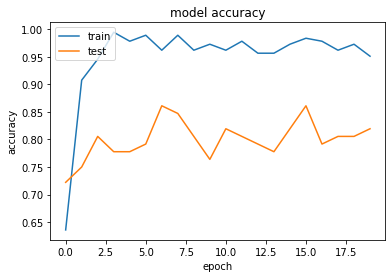

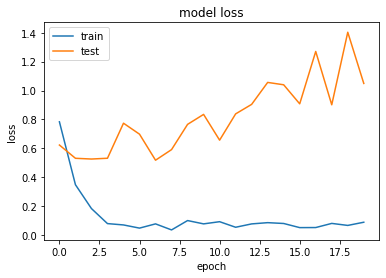

In [14]:
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#Save model 
model.save("ripeness.h5")

In [30]:
import tensorflowjs as tfjs

tfjs.converters.save_keras_model(model, 'model_output/')


In [20]:
best_model = keras.models.load_model('model_chkpt/weights.20_0.9648_0.7639.h5')

In [33]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 Conv1 (Conv2D)                 (None, None, None,   864         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, None, None,   128         ['Conv1[0][0]']                  
                                32)                                                           

### Inference

In [66]:
from PIL import Image, ImageOps

np.set_printoptions(suppress=True)

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1.
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# img_path = '/Users/i551982/Desktop/Github/banana/ripe-bananas.jpeg' #ripe 
# img_path = '/Users/i551982/Desktop/Github/banana/green_banana.jpeg' #unripe
img_path = '/Users/i551982/Desktop/Github/banana/overripe.jpeg'
# Replace this with the path to your image
image = Image.open(img_path)
#resizing the image to be at least 224x224 

size = (224, 224)
image = ImageOps.fit(image, size, Image.ANTIALIAS)

#turn the image into a numpy array
image_array = np.asarray(image)

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1

# Load the image into the array
data[0] = normalized_image_array

    
# Load the model
model = keras.models.load_model('ripeness.h5')

# run the inference
preds = ""
prediction = model.predict(data)
# max_val = np.amax(prediction)*100
# max_val = "%.2f" % max_val
if np.argmax(prediction)==0:
    preds = f"Overripe😫"
elif np.argmax(prediction)==1:
    preds = f"ripe😄"
else :
    preds = f"Unripe😑"

print(preds)

/var/folders/3v/kt3p4yx106n_9h7p5_4lqk7c0000gn/T/ipykernel_875/3416215446.py:18: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  image = ImageOps.fit(image, size, Image.ANTIALIAS)


1/1 [==============================] - 1s 525ms/step
Unripe😑


In [58]:
train_generator.class_indices

{'overripe': 0, 'ripe': 1, 'unripe': 2}

In [1]:

import tensorflow as tf
from PIL import Image, ImageOps
import numpy as np
import streamlit as st

st.title('Banana Ripeness Detection')
st.write('''
# Banana Ripeness Detection 🍌
''')
st.write("A Image Classification Web App That Detects the Ripeness Stage of Banana")

file = st.file_uploader("", type=['jpg','png'])

def predict_stage(image_data,model):
    size = (224, 224)
    image = ImageOps.fit(image_data,size, Image.ANTIALIAS)
    image_array = np.array(image)
    normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
    data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
    data[0] = normalized_image_array
    preds = ""
    prediction = model.predict(data)
    if np.argmax(prediction)==0:
        preds = f"Overripe😫"
    elif np.argmax(prediction)==1:
        preds = f"ripe😄"
    else :
        preds = f"Unripe😑"

    return prediction

if file is None:
    st.text("Please upload an image file")
else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    model = tf.keras.models.load_model('ripeness.h5')
    Generate_pred = st.button("Predict Ripeness Stage..")
    if Generate_pred:
        prediction = predict_stage(image, model)

2022-07-25 19:52:53.242 
  command:

    streamlit run /Users/i551982/opt/anaconda3/envs/tf/lib/python3.9/site-packages/ipykernel_launcher.py [ARGUMENTS]
